<a href="https://colab.research.google.com/github/fyprjgroup3/FY_project/blob/avik's_work/Labelizer_nbv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import json
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import string
import collections
pd.set_option("display.max_columns",2500)
pd.set_option("display.max_rows",2500)

### Data Import

In [2]:
#import the data
#data=pd.read_csv('/content/drive/My Drive/FY_project/dataset/results-20190513-ofapr19.csv')
data=pd.read_csv('E:\yearproject.csv')
data.head()

,action,url,title,body,labels
0,"""closed""","""https://github.com/Microsoft/vcpkg/issues/4548""","""Error: Building package zlib:x64-windows-stat...","""\r\nPackage: zlib:x64-windows-static\r\nVcpkg...","[{""id"":455857191,""node_id"":""MDU6TGFiZWw0NTU4NT..."
1,"""closed""","""https://github.com/primefaces/primeng/issues/...","""Pagination bug when removing an item""","""Reported by a PRO user;\r\n\r\n> If for exemp...","[{""id"":312160661,""node_id"":""MDU6TGFiZWwzMTIxNj..."
2,"""closed""","""https://github.com/zen-kernel/zen-kernel/issu...","""bfq error""","""Hi, Steven/\r\nAfter last update today >git f...",[]
3,"""closed""","""https://github.com/biig-io/ngx-smart-modal/is...","""Can't open next modal at once after closing p...","""\r\nwhen I click immediately after closing pr...",[]
4,"""closed""","""https://github.com/istio/istio/issues/12790""","""Helm podAntiAffinity templating error""","""**Describe the bug**\r\n\r\nHelm charts fail ...","[{""id"":670442116,""node_id"":""MDU6TGFiZWw2NzA0ND..."


In [3]:
print("No. of rows:",data.shape[0])

No. of rows: 7964


### Data Cleaning

In [4]:
print('No. of duplicate rows: ',data.duplicated().sum())

No. of duplicate rows:  3


In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.shape

(7961, 5)

In [7]:
# select necessary features
data=data[["title","body","labels"]]
data.head()

,title,body,labels
0,"""Error: Building package zlib:x64-windows-stat...","""\r\nPackage: zlib:x64-windows-static\r\nVcpkg...","[{""id"":455857191,""node_id"":""MDU6TGFiZWw0NTU4NT..."
1,"""Pagination bug when removing an item""","""Reported by a PRO user;\r\n\r\n> If for exemp...","[{""id"":312160661,""node_id"":""MDU6TGFiZWwzMTIxNj..."
2,"""bfq error""","""Hi, Steven/\r\nAfter last update today >git f...",[]
3,"""Can't open next modal at once after closing p...","""\r\nwhen I click immediately after closing pr...",[]
4,"""Helm podAntiAffinity templating error""","""**Describe the bug**\r\n\r\nHelm charts fail ...","[{""id"":670442116,""node_id"":""MDU6TGFiZWw2NzA0ND..."


In [8]:
# remove rows with empty labels
def clean(s):
    if s=="[]":
        s=np.nan
    return s
    
data['labels']=data['labels'].apply(lambda x: clean(x))
data.head()

,title,body,labels
0,"""Error: Building package zlib:x64-windows-stat...","""\r\nPackage: zlib:x64-windows-static\r\nVcpkg...","[{""id"":455857191,""node_id"":""MDU6TGFiZWw0NTU4NT..."
1,"""Pagination bug when removing an item""","""Reported by a PRO user;\r\n\r\n> If for exemp...","[{""id"":312160661,""node_id"":""MDU6TGFiZWwzMTIxNj..."
2,"""bfq error""","""Hi, Steven/\r\nAfter last update today >git f...",NaN
3,"""Can't open next modal at once after closing p...","""\r\nwhen I click immediately after closing pr...",NaN
4,"""Helm podAntiAffinity templating error""","""**Describe the bug**\r\n\r\nHelm charts fail ...","[{""id"":670442116,""node_id"":""MDU6TGFiZWw2NzA0ND..."


In [9]:
data.dropna(inplace=True)

In [10]:
data.head()

,title,body,labels
0,"""Error: Building package zlib:x64-windows-stat...","""\r\nPackage: zlib:x64-windows-static\r\nVcpkg...","[{""id"":455857191,""node_id"":""MDU6TGFiZWw0NTU4NT..."
1,"""Pagination bug when removing an item""","""Reported by a PRO user;\r\n\r\n> If for exemp...","[{""id"":312160661,""node_id"":""MDU6TGFiZWwzMTIxNj..."
4,"""Helm podAntiAffinity templating error""","""**Describe the bug**\r\n\r\nHelm charts fail ...","[{""id"":670442116,""node_id"":""MDU6TGFiZWw2NzA0ND..."
5,"""[0.5][Tradingview] Quick Chart resize does no...","""**Describe the bug**\r\nThe up and down arrow...","[{""id"":1089646255,""node_id"":""MDU6TGFiZWwxMDg5N..."
6,"""Upgrade isort""","""We are using 4.3.4 but [isort[(https://pypi.o...","[{""id"":717069763,""node_id"":""MDU6TGFiZWw3MTcwNj..."


In [11]:
print("No. of rows:",data.shape[0])

No. of rows: 4063


In [12]:
# check format of labels
data['labels'][:5]

0    [{"id":455857191,"node_id":"MDU6TGFiZWw0NTU4NT...
1    [{"id":312160661,"node_id":"MDU6TGFiZWwzMTIxNj...
4    [{"id":670442116,"node_id":"MDU6TGFiZWw2NzA0ND...
5    [{"id":1089646255,"node_id":"MDU6TGFiZWwxMDg5N...
6    [{"id":717069763,"node_id":"MDU6TGFiZWw3MTcwNj...
Name: labels, dtype: object

In [13]:
data['labels'][5]

'[{"id":1089646255,"node_id":"MDU6TGFiZWwxMDg5NjQ2MjU1","url":"https://api.github.com/repos/bitshares/bitshares-ui/labels/[1b]%20User%20Story","name":"[1b] User Story","color":"b8e4fc","default":false},{"id":272058720,"node_id":"MDU6TGFiZWwyNzIwNTg3MjA=","url":"https://api.github.com/repos/bitshares/bitshares-ui/labels/[3]%20Bug","name":"[3] Bug","color":"b60205","default":false},{"id":522016380,"node_id":"MDU6TGFiZWw1MjIwMTYzODA=","url":"https://api.github.com/repos/bitshares/bitshares-ui/labels/[4c]%20High%20Priority","name":"[4c] High Priority","color":"fbca04","default":false},{"id":1089668332,"node_id":"MDU6TGFiZWwxMDg5NjY4MzMy","url":"https://api.github.com/repos/bitshares/bitshares-ui/labels/[5a]%20Tiny","name":"[5a] Tiny","color":"f9aed0","default":false},{"id":1133046734,"node_id":"MDU6TGFiZWwxMTMzMDQ2NzM0","url":"https://api.github.com/repos/bitshares/bitshares-ui/labels/[6]%20RC%20Blockage","name":"[6] RC Blockage","color":"0052cc","default":false},{"id":1134524965,"node_id"

In [14]:
#since labels are of string type, convert into list of dictionaries
json.loads(data['labels'][5])

[{'id': 1089646255,
  'node_id': 'MDU6TGFiZWwxMDg5NjQ2MjU1',
  'url': 'https://api.github.com/repos/bitshares/bitshares-ui/labels/[1b]%20User%20Story',
  'name': '[1b] User Story',
  'color': 'b8e4fc',
  'default': False},
 {'id': 272058720,
  'node_id': 'MDU6TGFiZWwyNzIwNTg3MjA=',
  'url': 'https://api.github.com/repos/bitshares/bitshares-ui/labels/[3]%20Bug',
  'name': '[3] Bug',
  'color': 'b60205',
  'default': False},
 {'id': 522016380,
  'node_id': 'MDU6TGFiZWw1MjIwMTYzODA=',
  'url': 'https://api.github.com/repos/bitshares/bitshares-ui/labels/[4c]%20High%20Priority',
  'name': '[4c] High Priority',
  'color': 'fbca04',
  'default': False},
 {'id': 1089668332,
  'node_id': 'MDU6TGFiZWwxMDg5NjY4MzMy',
  'url': 'https://api.github.com/repos/bitshares/bitshares-ui/labels/[5a]%20Tiny',
  'name': '[5a] Tiny',
  'color': 'f9aed0',
  'default': False},
 {'id': 1133046734,
  'node_id': 'MDU6TGFiZWwxMTMzMDQ2NzM0',
  'url': 'https://api.github.com/repos/bitshares/bitshares-ui/labels/[6]%20

In [15]:
#extract only name field from labels
[x['name'] for x in json.loads(data['labels'][5])]

['[1b] User Story',
 '[3] Bug',
 '[4c] High Priority',
 '[5a] Tiny',
 '[6] RC Blockage',
 '[7] Estimated']

In [16]:
#convert into list of lists
labels=[]
for i in data['labels']:
    labels.append([x['name'] for x in json.loads(i)])
labels[:5]

[['needs-repro'],
 ['enhancement'],
 ['area/environments'],
 ['[1b] User Story',
  '[3] Bug',
  '[4c] High Priority',
  '[5a] Tiny',
  '[6] RC Blockage',
  '[7] Estimated'],
 ['feature-refactoring', 'good first issue', 'needs PR', 'type-code health']]

In [17]:
data['labels']=labels
data.head()

,title,body,labels
0,"""Error: Building package zlib:x64-windows-stat...","""\r\nPackage: zlib:x64-windows-static\r\nVcpkg...",[needs-repro]
1,"""Pagination bug when removing an item""","""Reported by a PRO user;\r\n\r\n> If for exemp...",[enhancement]
4,"""Helm podAntiAffinity templating error""","""**Describe the bug**\r\n\r\nHelm charts fail ...",[area/environments]
5,"""[0.5][Tradingview] Quick Chart resize does no...","""**Describe the bug**\r\nThe up and down arrow...","[[1b] User Story, [3] Bug, [4c] High Priority,..."
6,"""Upgrade isort""","""We are using 4.3.4 but [isort[(https://pypi.o...","[feature-refactoring, good first issue, needs ..."


In [18]:
stopwords = nltk.corpus.stopwords.words('english')

In [19]:
print(len(stopwords))

179


In [20]:
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
# function for text cleaning 
def clean_text(s):
    s=re.sub("[\'\"]"," ",s) #remove ' and "
    s=re.sub('\\\\r',' ',s)  #remove \r
    s=re.sub('\\\\n',' ',s)  #remove \n
    s=re.sub('[^a-zA-Z]',' ',s) #remove everything but letters
    s=''.join([char for char in s if char not in string.punctuation]) #remove all punctuations
    s=' '.join(s.split()) # remove whitespaces 
    s=s.lower()# convert text to lowercase 
    return s

In [23]:
# clean title and body fields
data['title'] = data['title'].apply(lambda x: clean_text(x))
data['body'] = data['body'].apply(lambda x: clean_text(x))

In [24]:
data.head()

,title,body,labels
0,error building package zlib x windows static f...,package zlib x windows static vcpkg version debug,[needs-repro]
1,pagination bug when removing an item,reported by a pro user if for exemple we have ...,[enhancement]
4,helm podantiaffinity templating error,describe the bug helm charts fail to generate ...,[area/environments]
5,tradingview quick chart resize does not honor ...,describe the bug the up and down arrows for tr...,"[[1b] User Story, [3] Bug, [4c] High Priority,..."
6,upgrade isort,we are using but isort https pypi org project ...,"[feature-refactoring, good first issue, needs ..."


In [25]:
#find most frequent words in title and body
def freq_words(x,no=30): 
    all_words=' '.join([text for text in x]) 
    all_words=all_words.split() 
    fdict=nltk.FreqDist(all_words) 
    df=pd.DataFrame({'word':list(fdict.keys()),'count':list(fdict.values())}) 

    # select top n most frequent words 
    d=df.nlargest(columns="count",n=no) 

    # visualize words and frequencies
    plt.figure(figsize=(12,10)) 
    sns.barplot(x=d['count'],y=d['word'])  

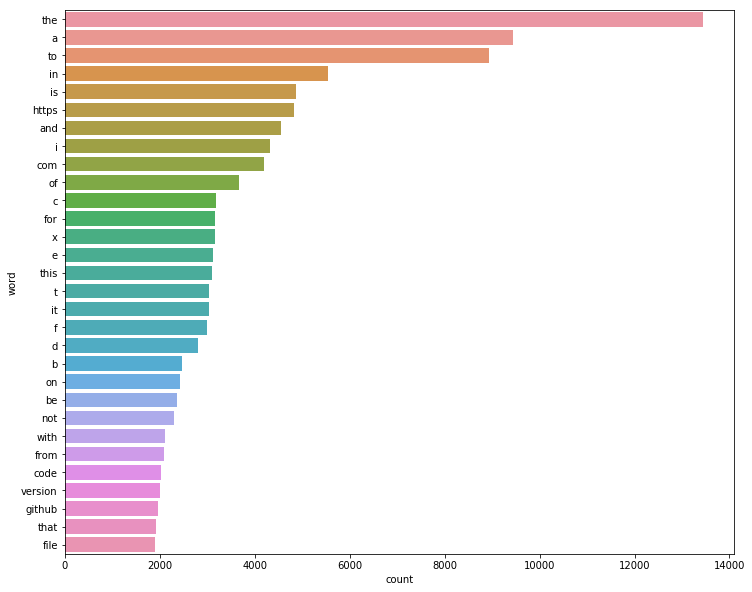

In [26]:
freq_words(data['body'])

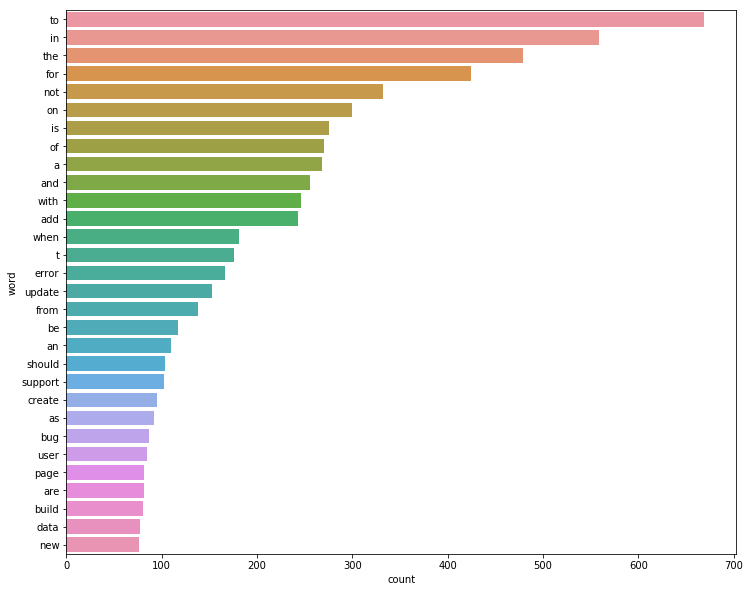

In [27]:
freq_words(data['title'])

Along with normal stopwords, other not very important words are also present that do not describe the text much.

In [28]:
stopwords.extend(['www','com','r','n','c','e','f','b','g','h','l','http','https','u','v','x','z','de','non','rb','ef','li','ts'\
                  ,'p','md','ci','go','cli','en','ms','br','sdm','us','k','cc','eslint','tat','im','fbadb','cccfb','dali'])
def remove_stopwords(s):
    s =' '.join([w for w in s.split() if not w in stopwords]) 
    return s

In [29]:
data['title'] = data['title'].apply(lambda x: remove_stopwords(x))
data['body'] = data['body'].apply(lambda x: remove_stopwords(x))

In [30]:
data.head() 

,title,body,labels
0,error building package zlib windows static fai...,package zlib windows static vcpkg version debug,[needs-repro]
1,pagination bug removing item,reported pro user exemple table items per page...,[enhancement]
4,helm podantiaffinity templating error,describe bug helm charts fail generate proper ...,[area/environments]
5,tradingview quick chart resize honor limit values,describe bug arrows tradingview chart size wor...,"[[1b] User Story, [3] Bug, [4c] High Priority,..."
6,upgrade isort,using isort pypi org project isort latest migh...,"[feature-refactoring, good first issue, needs ..."


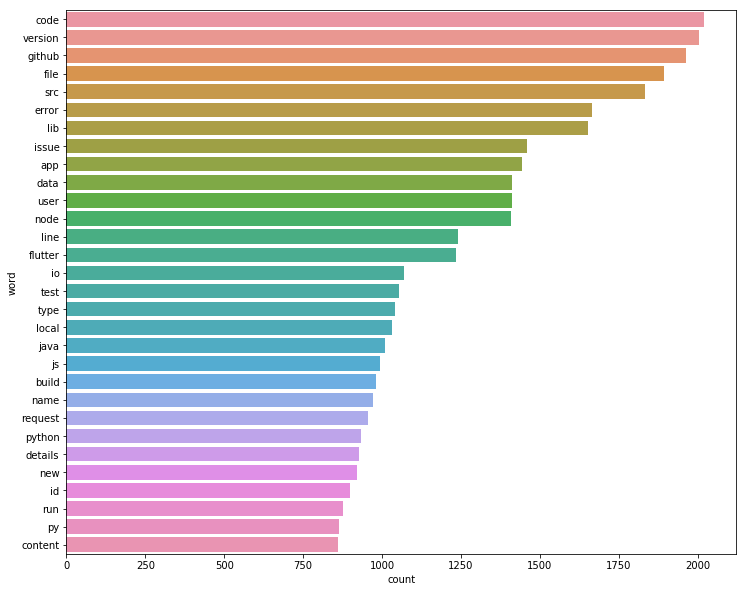

In [31]:
freq_words(data['body'])

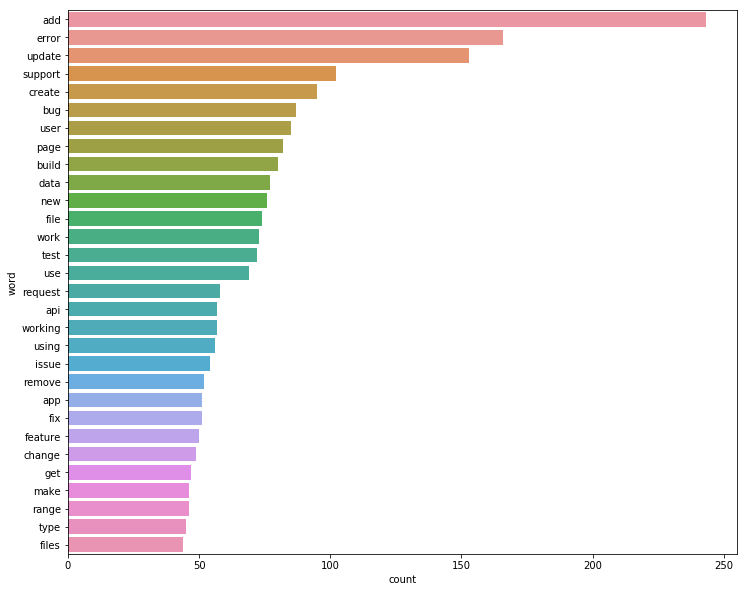

In [32]:
freq_words(data['title'])

In [33]:
data.head()

,title,body,labels
0,error building package zlib windows static fai...,package zlib windows static vcpkg version debug,[needs-repro]
1,pagination bug removing item,reported pro user exemple table items per page...,[enhancement]
4,helm podantiaffinity templating error,describe bug helm charts fail generate proper ...,[area/environments]
5,tradingview quick chart resize honor limit values,describe bug arrows tradingview chart size wor...,"[[1b] User Story, [3] Bug, [4c] High Priority,..."
6,upgrade isort,using isort pypi org project isort latest migh...,"[feature-refactoring, good first issue, needs ..."


In [34]:
#Labels of different issues are in different forms as they are created manually
#Need to bring all in same shape to get proper count

def clean_label(l):
    s=','.join(l) # convert list to string
    s=re.sub(r'\[[^\]]*\]','',s) # remove everything within []
    s=re.sub('[^a-zA-Z\,]',' ',s) # remove everything but letters and comma
    s=' '.join(s.split()) # remove extra spaces
    s=s.lower() # to lowercase
    lst=s.split(',')
    return [lb.strip() for lb in lst] #strip spaces

In [35]:
data['clean_lbl']=data['labels'].apply(lambda x: clean_label(x))

In [36]:
data.head()

,title,body,labels,clean_lbl
0,error building package zlib windows static fai...,package zlib windows static vcpkg version debug,[needs-repro],[needs repro]
1,pagination bug removing item,reported pro user exemple table items per page...,[enhancement],[enhancement]
4,helm podantiaffinity templating error,describe bug helm charts fail generate proper ...,[area/environments],[area environments]
5,tradingview quick chart resize honor limit values,describe bug arrows tradingview chart size wor...,"[[1b] User Story, [3] Bug, [4c] High Priority,...","[user story, bug, high priority, tiny, rc bloc..."
6,upgrade isort,using isort pypi org project isort latest migh...,"[feature-refactoring, good first issue, needs ...","[feature refactoring, good first issue, needs ..."


In [37]:
#get all labels in a single list
l=[]
for i in data['clean_lbl']:
    l.append(i)

In [38]:
l[:5]

[['needs repro'],
 ['enhancement'],
 ['area environments'],
 ['user story', 'bug', 'high priority', 'tiny', 'rc blockage', 'estimated'],
 ['feature refactoring', 'good first issue', 'needs pr', 'type code health']]

In [39]:
#Count frequency of labels
count={}
for y in l:  
    for x in y:
        if x not in count:
            count[x]=1
        else:
            count[x]+=1
d = collections.Counter(count)
freq=[]
for w,c in d.most_common(2502):
    freq.append([w,c])

In [40]:
#top 50 frequent labels
freq[:50]

[['bug', 754],
 ['enhancement', 617],
 ['question', 160],
 ['help wanted', 109],
 ['good first issue', 96],
 ['type bug', 89],
 ['', 85],
 ['feature', 84],
 ['wontfix', 75],
 ['stale', 57],
 ['in progress', 54],
 ['p', 52],
 ['priority high', 47],
 ['greenkeeper', 47],
 ['triaged', 43],
 ['priority medium', 40],
 ['task', 39],
 ['documentation', 39],
 ['duplicate', 38],
 ['type enhancement', 37],
 ['feature request', 31],
 ['invalid', 30],
 ['kind bug', 29],
 ['p medium', 27],
 ['high priority', 25],
 ['docs', 25],
 ['user submission', 25],
 ['ui', 23],
 ['assigned to author', 23],
 ['priority p', 23],
 ['review', 22],
 ['version', 22],
 ['design', 19],
 ['priority low', 18],
 ['fixed', 18],
 ['v', 18],
 ['n adguard browser extension', 18],
 ['frontend', 18],
 ['epic', 18],
 ['support', 17],
 ['front end', 17],
 ['browser firefox', 17],
 ['priority critical', 16],
 ['priority', 16],
 ['type feature', 16],
 ['backend', 15],
 ['backlog', 14],
 ['sprint', 14],
 ['needs more info', 14],
 [

In [41]:
#"type bug","kind bug" & "bug fix" are same, need to make them all as "bug"
#Same thing applies for other labels. Using multiple string replaces for the same purpose
lbls=[]
for i in l:
    i=[w.replace('type bug','bug').replace('kind bug','bug').replace('bug fix','bug').replace('bug bug','bug')
       .replace('c enhancement','enhancement').replace('doenhancement','enhancement').replace('type enhancement','enhancement')
       .replace('kind enhancement','enhancement').replace('improvement','enhancement').replace('suggestion','enhancement')
       .replace('t be enhancement','enhancement').replace('t fe enhancement','enhancement')
       .replace('feature request','feature').replace('new feature','feature').replace('type feature','feature')
       .replace('kind feature','feature').replace('feature refactoring','feature')
       .replace('priority high','highpriority').replace('priority critical','highpriority').replace('priority p','highpriority')
       .replace('high priority','highpriority').replace('p high','highpriority').replace('priority important','highpriority')
       .replace('priority medium','mediumpriority').replace('medium priority','mediumpriority')
       .replace('priority med','mediumpriority').replace('p medium','mediumpriority')
       .replace('low priority','lowpriority').replace('priority low','lowpriority')
       .replace('type question','question').replace('kind question','question')
       .replace('type support','support').replace('help wanted','helpwanted')
       .replace('docs','documentation').replace('documentation needed','documentation').replace('type documentation','documentation')
       .replace('type task','task').replace('front end','frontend')
       .replace('type helpwanted','helpwanted').replace('in review','review').replace('triaged','triage') for w in i]
    lbls.append(i)

In [42]:
count={}
for y in lbls:
    for x in y:
        if x not in count:
            count[x]=1
        else:
            count[x]+=1
d = collections.Counter(count)
freq=[]
for w,c in d.most_common():
    freq.append([w,c])

In [43]:
freq[:50]

[['bug', 882],
 ['enhancement', 692],
 ['question', 178],
 ['feature', 158],
 ['highpriority', 137],
 ['helpwanted', 113],
 ['good first issue', 96],
 ['', 85],
 ['documentation', 77],
 ['wontfix', 75],
 ['mediumpriority', 75],
 ['triage', 57],
 ['stale', 57],
 ['in progress', 54],
 ['p', 52],
 ['greenkeeper', 47],
 ['task', 43],
 ['duplicate', 38],
 ['frontend', 35],
 ['review', 35],
 ['invalid', 30],
 ['lowpriority', 28],
 ['support', 28],
 ['user submission', 25],
 ['ui', 23],
 ['assigned to author', 23],
 ['version', 22],
 ['design', 19],
 ['fixed', 18],
 ['v', 18],
 ['n adguard browser extension', 18],
 ['epic', 18],
 ['browser firefox', 17],
 ['priority', 16],
 ['backend', 15],
 ['backlog', 14],
 ['sprint', 14],
 ['needs more info', 14],
 ['new version', 14],
 ['cxp', 14],
 ['browser firefox mobile', 14],
 ['discussion', 13],
 ['medium', 13],
 ['target', 12],
 ['todo', 12],
 ['approved', 12],
 ['ver', 12],
 ['eps', 11],
 ['in scope june', 11],
 ['lang zh', 11]]

In [44]:
#add cleaned labels to the dataset
data['lbls_clean']=lbls
data.head()

,title,body,labels,clean_lbl,lbls_clean
0,error building package zlib windows static fai...,package zlib windows static vcpkg version debug,[needs-repro],[needs repro],[needs repro]
1,pagination bug removing item,reported pro user exemple table items per page...,[enhancement],[enhancement],[enhancement]
4,helm podantiaffinity templating error,describe bug helm charts fail generate proper ...,[area/environments],[area environments],[area environments]
5,tradingview quick chart resize honor limit values,describe bug arrows tradingview chart size wor...,"[[1b] User Story, [3] Bug, [4c] High Priority,...","[user story, bug, high priority, tiny, rc bloc...","[user story, bug, highpriority, tiny, rc block..."
6,upgrade isort,using isort pypi org project isort latest migh...,"[feature-refactoring, good first issue, needs ...","[feature refactoring, good first issue, needs ...","[feature, good first issue, needs pr, type cod..."


In [45]:
#Not all labels can be taken for model building
#Selecting top 50 frequent labels
selected_labels=[]
for i in freq[:50]:
    selected_labels.append(i[0])

In [46]:
selected_labels[:5]

['bug', 'enhancement', 'question', 'feature', 'highpriority']

In [47]:
dset=data[["title","body","lbls_clean"]]
dset.head()

,title,body,lbls_clean
0,error building package zlib windows static fai...,package zlib windows static vcpkg version debug,[needs repro]
1,pagination bug removing item,reported pro user exemple table items per page...,[enhancement]
4,helm podantiaffinity templating error,describe bug helm charts fail generate proper ...,[area environments]
5,tradingview quick chart resize honor limit values,describe bug arrows tradingview chart size wor...,"[user story, bug, highpriority, tiny, rc block..."
6,upgrade isort,using isort pypi org project isort latest migh...,"[feature, good first issue, needs pr, type cod..."


In [48]:
#Keep only selected labels and remove others
#each row is intersected with the selected_labels lists
def intersection(lst1, lst2): 
    temp = set(lst2) 
    lst3 = [value for value in lst1 if value in temp] 
    return lst3

dset['lbls_clean']=[intersection(selected_labels,i) for i in dset['lbls_clean']]
dset.head(10)

C:\Users\Dhriti Dhruve\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,body,lbls_clean
0,error building package zlib windows static fai...,package zlib windows static vcpkg version debug,[]
1,pagination bug removing item,reported pro user exemple table items per page...,[enhancement]
4,helm podantiaffinity templating error,describe bug helm charts fail generate proper ...,[]
5,tradingview quick chart resize honor limit values,describe bug arrows tradingview chart size wor...,"[bug, highpriority]"
6,upgrade isort,using isort pypi org project isort latest migh...,"[feature, good first issue]"
7,configurable window completion,fixed window completion given questionnaire co...,[feature]
8,telemetry add search counts baseline ping,follow github mozilla mobile fenix issues issu...,[p]
9,sql show zone configuration table table name p...,describe problem partitioned table created rep...,[enhancement]
12,add ice snow melt flag general flag category,could useful cases,"[enhancement, lowpriority]"
13,vulnerability ddos get api projects,project apitestuat template apiv projectsgetqu...,[]


In [49]:
#Selected labels resulted in some empty labels as many repositories do not have them
def clean(s):
    if len(s)==0:
        s=np.nan
    return s

ldata=dset.copy(deep=True)   
ldata['lbls_clean']=ldata['lbls_clean'].apply(lambda x: clean(x))
ldata.dropna(inplace=True) #Removing empty-label rows

In [50]:
ldata.shape

(2827, 3)

In [51]:
#rows having body and title with empty values are removed
ldata=ldata[ldata['body']!=""]
ldata=ldata[ldata['title']!=""]

In [52]:
#finally dataset is reduced to 2543 rows after cleaning and pre-processing
ldata.shape

(2543, 3)

In [53]:
ldata.reset_index(inplace=True,drop=True)

In [54]:
ldata.head()

,title,body,lbls_clean
0,pagination bug removing item,reported pro user exemple table items per page...,[enhancement]
1,tradingview quick chart resize honor limit values,describe bug arrows tradingview chart size wor...,"[bug, highpriority]"
2,upgrade isort,using isort pypi org project isort latest migh...,"[feature, good first issue]"
3,configurable window completion,fixed window completion given questionnaire co...,[feature]
4,telemetry add search counts baseline ping,follow github mozilla mobile fenix issues issu...,[p]


### Model Building

In [55]:
from sklearn.preprocessing import MultiLabelBinarizer

In [56]:
mb=MultiLabelBinarizer()

In [57]:
mb.fit(ldata['lbls_clean'])

MultiLabelBinarizer(classes=None, sparse_output=False)

In [58]:
y=mb.transform(ldata['lbls_clean'])

In [59]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tfidf=TfidfVectorizer(max_features=100)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(ldata['body'], y, test_size=0.33, random_state=42)

In [64]:
xtrain_tfidf=tfidf.fit_transform(X_train)
xtest_tfidf=tfidf.transform(X_test)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

In [66]:
lr=LogisticRegression()
clf=OneVsRestClassifier(lr)

In [67]:
clf.fit(xtrain_tfidf,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [68]:
pred=clf.predict(xtest_tfidf)

In [69]:
pred[5]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [70]:
print("predicted:",mb.inverse_transform(pred)[5])
print("actual:",mb.inverse_transform(y_test)[5])

predicted: ('bug',)
actual: ('bug',)


In [71]:
f1_score(y_test,pred,average="micro")

0.2352941176470588

f1-score of 0.2352941176470588 achieved using 0.5 as threshold probability

In [72]:
#Get prediction probalities
prob=clf.predict_proba(xtest_tfidf)

In [73]:
#Set threshold of 0.2 instead of 0.5
#Hence any probability >= 0.2 will be 1, else 0.
t=0.2
pred_new=(prob>=t).astype(int)

In [74]:
f1_score(y_test,pred_new,average="micro")

0.41789667896678967

f1-score of 0.41789667896678967 achieved using 0.2 as threshold probability